# Uniform Quantization and Dequantization

This notebook demonstrates the process of uniform quantization and dequantization on a 1D array of random values. The steps include generating the array, applying the quantization, and visualizing the results.

# Step 1: Generate a 1D array with random values

Below is the float-type (FP32) array of random values between 0 and 1, sorted in ascending order.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

realVals = np.random.uniform(0, 1, 10) # For visualization convenience, we choose values between 0 and 1 (To see the true effect of quantization, set values between -1 and 1)
realVals.sort()
print("FP32 (real-value) array:", realVals)

FP32 (real-value) array: [0.09661316 0.28946258 0.41665833 0.48940954 0.55885931 0.57548302
 0.76687062 0.81044561 0.83375874 0.93536931]


## Step 2: Define Uniform Quantization and Dequantization Functions

Here we define the functions for uniform quantization and dequantization. The function requires the range of the real-values (by default -1.0--1.0) and number of quantization levels (assuming 3-bit quantization).

In [ ]:
def uniform_quantization(arr, range = [-1.0, 1.0], num_levels = 2**3):
    Min_r = range[0]
    Max_r = range[1]
    Min_q = -num_levels // 2    # two's complement representation
    Max_q = num_levels // 2 - 1

    S = (Max_r - Min_r) / (Max_q - Min_q)
    Z = Min_q - round(Min_r / S)

    q = Z + np.round(arr / S).astype(int)
    r = S * (q - Z)

    return q, r

## Step 3: Apply Uniform Quantization

We apply the uniform quantization to the original array with a specified number of bits for quantization.

In [ ]:
from pprint import pprint
bit = 3
num_levels = 2**bit
quantVals, dequantVals = uniform_quantization(realVals, [-1.0, 1.0], num_levels)

pprint(quantVals)
pprint(dequantVals)
pprint(realVals)

array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3])
array([0.        , 0.28571429, 0.28571429, 0.57142857, 0.57142857,
       0.57142857, 0.85714286, 0.85714286, 0.85714286, 0.85714286])
array([0.09661316, 0.28946258, 0.41665833, 0.48940954, 0.55885931,
       0.57548302, 0.76687062, 0.81044561, 0.83375874, 0.93536931])


## Step 4: Visualization

Finally, we visualize the original and quantized arrays.

<ipython-input-24-dd5a1cb0ae6d>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(realVals, use_line_collection=True, linefmt='b')
<ipython-input-24-dd5a1cb0ae6d>:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(quantVals, use_line_collection=True, linefmt='g')


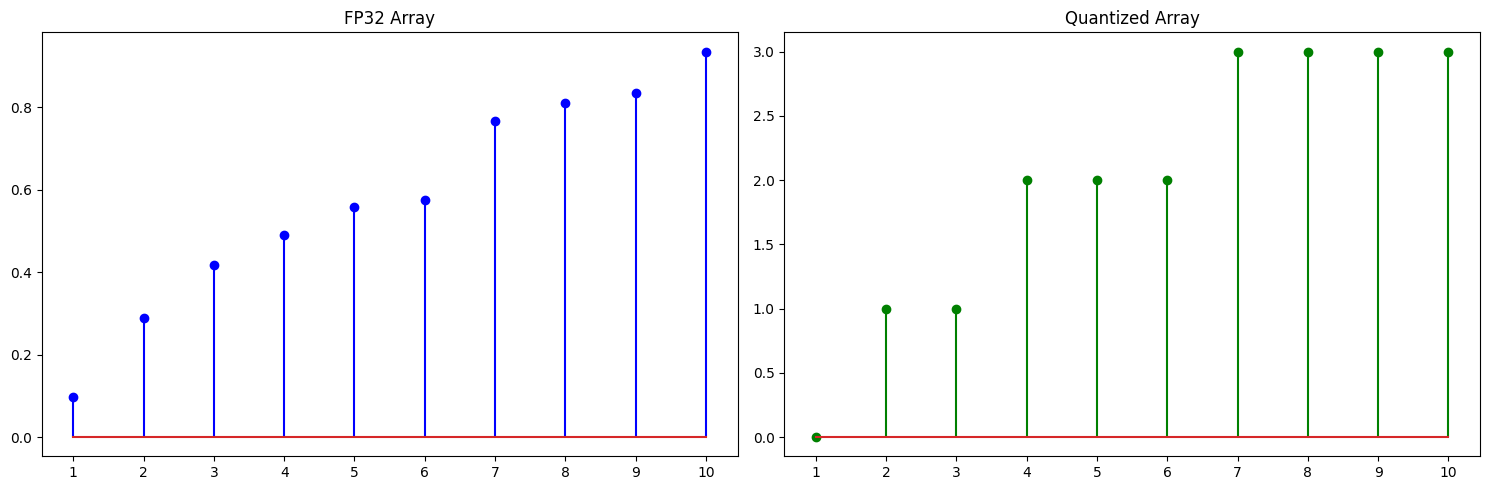

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.stem(realVals, use_line_collection=True, linefmt='b')
plt.title("FP32 Array")
plt.xticks(range(len(realVals)), range(1, len(realVals) + 1))

plt.subplot(1, 2, 2)
plt.stem(quantVals, use_line_collection=True, linefmt='g')
plt.title("Quantized Array")
plt.xticks(range(len(quantVals)), range(1, len(quantVals) + 1))

plt.tight_layout()
plt.show()

## Step 4-1: Visualization (Quantization Error)

The following visualization shows both the original and dequantized arrays, highlighting the quantization error.


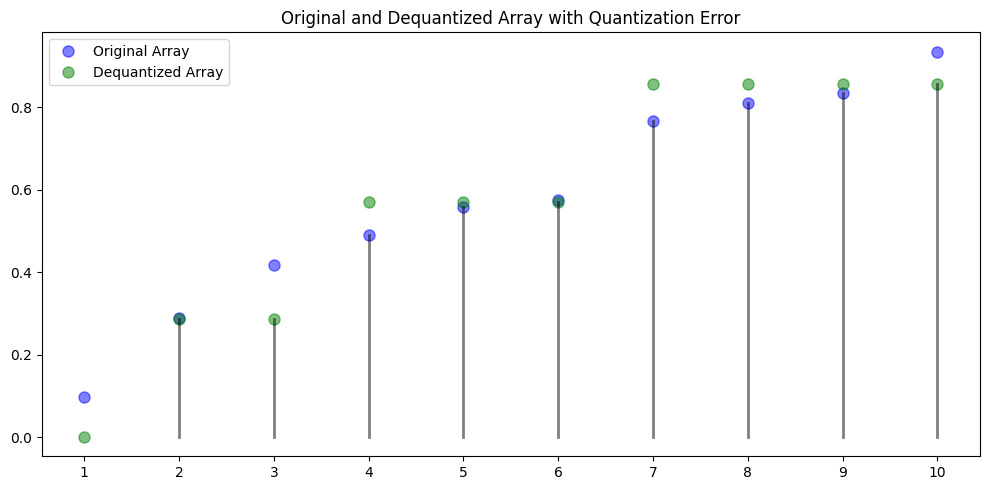

In [ ]:
plt.figure(figsize=(10, 5))

markerline1, = plt.plot(np.arange(len(realVals)), realVals, 'bo', label='Original Array', markersize=8, alpha=0.5)
markerline2, = plt.plot(np.arange(len(dequantVals)), dequantVals, 'go', label='Dequantized Array', markersize=8, alpha=0.5)

for i in range(len(realVals)):
    plt.plot([i, i], [0, min(realVals[i], dequantVals[i])], 'k-', linewidth=2, alpha=0.5)  # Black short stem
    #plt.plot([i, i], [min(array[i], dequantized_array[i]), max(array[i], dequantized_array[i])], 'r--', linewidth=2, alpha=0.5)  # Red error

plt.title("Original and Dequantized Array with Quantization Error")
plt.xticks(np.arange(len(realVals)), np.arange(1, len(realVals) + 1))
plt.legend()
plt.tight_layout()
plt.show()